
#**CNN:** Binary classification
*~~ Avni Bansal*


**Colab link -** [https://colab.research.google.com/drive/1MlL72F_a_qvLZ7xjj6F4hpZF8B_Kbrw3?authuser=0#scrollTo=73W2eXOWTLwa](https://)


**My Aim:** To learn application of Convolutional Neural Networks with binary image classification.


**Dataset link:** [https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification?resource=download](https://)

#Structure of dataset in drive

DATASET
--> PandasBears
*   **Train**
*   --> panda
*   --> bear

*   **Test**
*   --> panda
*   --> bear


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After mounting; I'll assign variables to train and test datasets.

In [2]:
train_path='/content/drive/MyDrive/Dataset/PandasBears/Train'
valid_path='/content/drive/MyDrive/Dataset/PandasBears/Validation'
test_path='/content/drive/MyDrive/Dataset/PandasBears/Test'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Pandas','Bears'],batch_size=50)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['Pandas','Bears'],batch_size=50)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Pandas','Bears'],batch_size=50,shuffle=True)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.




---


From [https://github.com/harimurugan1989/Softcomputing/tree/master](https://) Ex5; Below lines for testing the class detected.
STARTS HERE


---



In [5]:
imgs,labels=next(train_batches)

In [6]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

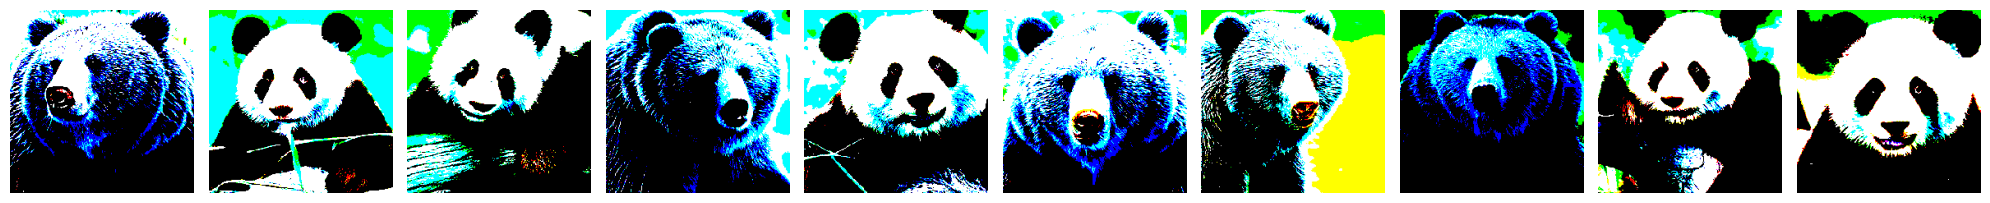

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)



---
ENDS HERE


---




In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
model=Sequential([
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*32+1)*64
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=2,activation='softmax'), #param=size of flatten*2+2
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=1)

Epoch 1/10
8/8 [==============================] - 109s 15s/step - loss: 74.7935 - accuracy: 0.5725 - val_loss: 1.4882 - val_accuracy: 0.9200
Epoch 2/10
8/8 [==============================] - 2s 310ms/step - loss: 9.3626 - accuracy: 0.8625 - val_loss: 2.7922 - val_accuracy: 0.9300
Epoch 3/10
8/8 [==============================] - 3s 321ms/step - loss: 0.6773 - accuracy: 0.9825 - val_loss: 1.2569 - val_accuracy: 0.9400
Epoch 4/10
8/8 [==============================] - 3s 379ms/step - loss: 2.3549 - accuracy: 0.9700 - val_loss: 0.3802 - val_accuracy: 0.9800
Epoch 5/10
8/8 [==============================] - 2s 310ms/step - loss: 0.7036 - accuracy: 0.9925 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 2s 309ms/step - loss: 0.0894 - accuracy: 0.9975 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 2s 310ms/step - loss: 0.0828 - accuracy: 0.9950 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8

In [13]:
predictions=model.predict(x=test_batches,verbose="auto")

2/2 [==============================] - 20s 19s/step


In [14]:
predictions

array([[1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 6.112245e-32],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
 

In [15]:
for [i,j] in predictions:
  if(i<j):
    print("Bear")
  else:
    print("Panda")



Panda
Bear
Panda
Bear
Bear
Panda
Bear
Panda
Bear
Bear
Bear
Panda
Panda
Panda
Panda
Bear
Bear
Bear
Panda
Panda
Bear
Panda
Panda
Bear
Bear
Bear
Bear
Bear
Panda
Bear
Bear
Panda
Panda
Panda
Bear
Panda
Bear
Bear
Panda
Panda
Bear
Panda
Panda
Panda
Bear
Panda
Bear
Bear
Bear
Bear
Panda
Bear
Bear
Bear
Bear
Panda
Panda
Bear
Bear
Panda
Bear
Panda
Panda
Panda
Panda
Bear
Panda
Panda
Panda
Panda
Panda
Panda
Bear
Bear
Panda
Bear
Panda
Panda
Panda
Bear
Bear
Bear
Panda
Bear
Bear
Bear
Bear
Bear
Panda
Panda
Panda
Bear
Panda
Panda
Panda
Panda
Panda
Bear
Bear
Bear


In [16]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [17]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [29]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = (cm.max()-cm.min()) / 2 + cm.min()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[23 27]
 [27 23]]


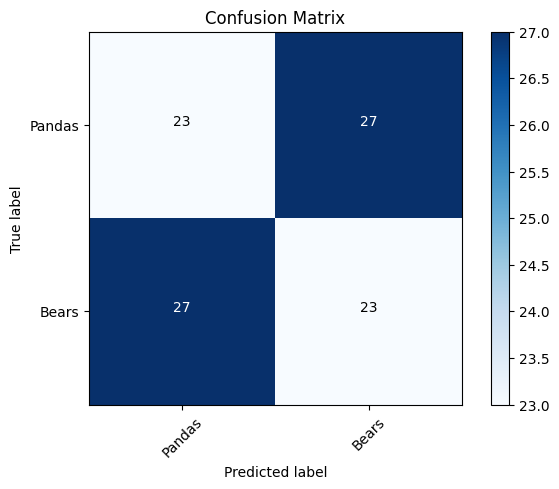

In [30]:
cm_plot_labels=['Pandas','Bears']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')